# Assignment 1: Analyzing 911 Call Data in Montgomery County

## Objective:
Montgomery County has experienced a significant rise in emergency 911 calls. This assignment aims to analyze the collected data to identify patterns, trends, and insights that could help optimize emergency response operations.

## Dataset Overview:
The dataset contains approximately 260,000 records of 911 calls made over the past year in Montgomery County. It includes the following attributes:

- lat: Latitude
- lng: Longitude
- desc: Description of the Emergency Call
- zip: Zipcode
- title: Title (Indicating the reason for the call)
- timeStamp: Timestamp (YYYY-MM-DD HH:MM:SS)
- twp: Township
- addr: Address
- e: Dummy variable (always 1)

## Assignment Tasks:

### Task 1: Data Loading and Initial Exploration (15 pts)


1.   Load the dataset into a pandas DataFrame. (5 pts)
2.   Display the first 10 records of the dataset to understand its structure. (5 pts)
3.   Print a summary of the dataset, including the total number of records and the data types of each attribute. (5 pts)



In [21]:
# Defining imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# Loading data into data frame (1.1)
data = pd.read_csv('911.csv')
print("-----------------------------------")

# Loading first 10 records (1.2)
print(data.head(10))
print("-----------------------------------")

# Printing summary of dataset and total records, types, and attributes (1.3)
print(data.size)
print("-----------------------------------")
print(data.dtypes)
print("-----------------------------------")
print(data.describe())
print("-----------------------------------")

-----------------------------------
         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   
5  40.253473 -75.283245  CANNON AVE & W 9TH ST;  LANSDALE; Station 345;...   
6  40.182111 -75.127795  LAUREL AVE & OAKDALE AVE;  HORSHAM; Station 35...   
7  40.217286 -75.405182  COLLEGEVILLE RD & LYWISKI RD;  SKIPPACK; Stati...   
8  40.289027 -75.399590  MAIN ST & OLD SUMNEYTOWN PIKE;  LOWER SALFORD;...   
9  40.102398 -75.291458  BLUEROUTE  & RAMP I476 NB TO CHEMICAL RD; PLYM...   

       zip                        title         timeStamp                twp  \
0  19525.0       EMS: BAC

### Task 2: Data Cleaning (25 pts)
1.   Check for missing values in each column. If there are any, discuss how you would handle them. (5 pts)
2.   Convert the timeStamp column to a DateTime object in pandas. (5 pts)
3.   Extract the year, month, day, and time from the timeStamp column into separate columns. (5 pts)
4.   Verify if the lat and lng columns are in the correct data format. If not, convert them to numeric. (5 pts)
5.   Discuss any anomalies or irregularities in the data that could affect the analysis. (5 pts)



(2.1) For each missing values, it would be a good idea to replace them with either a '0' or the 'None'. I decided to replace all column's with numbers with 0, and columns with strings with 'None'.

In [23]:
# Filling the missing values (2.1)

data["lat"].fillna(0,inplace=True)
data["lng"].fillna(0,inplace=True)
data["desc"].fillna('None',inplace=True)
data["zip"].fillna(0,inplace=True)
data["title"].fillna('None',inplace=True)
data["addr"].fillna('None',inplace=True)
data["twp"].fillna('None',inplace=True)
data["e"].fillna(0,inplace=True)

C:\Users\Aman\AppData\Local\Temp\ipykernel_10528\3791547152.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["lat"].fillna(0,inplace=True)
C:\Users\Aman\AppData\Local\Temp\ipykernel_10528\3791547152.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [24]:
# Converting timeStamp column to Data time object in pandas (2.2)
data["timeStamp"] = pd.to_datetime(data["timeStamp"], format='mixed', dayfirst=True)
print(data["timeStamp"])

0        2015-12-10 17:10:00
1        2015-12-10 17:29:00
2        2015-12-10 14:39:00
3        2015-12-10 16:47:00
4        2015-12-10 16:56:00
                 ...        
266538   2017-11-03 20:00:00
266539   2017-11-03 20:09:00
266540   2017-11-03 20:12:00
266541   2017-11-03 20:25:00
266542   2017-11-03 20:28:00
Name: timeStamp, Length: 266543, dtype: datetime64[ns]


In [25]:
# Extracting the year, month, day, and time, and putting them into seperate columns (2.3)
data['year'] = data['timeStamp'].dt.year
data['month'] = data['timeStamp'].dt.month
data['day'] = data['timeStamp'].dt.day
data['time'] = data['timeStamp'].dt.time
print(data)

              lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
266538  40.116135 -75.334257   
266539  40.033578 -75.267095   
266540  40.117388 -75.350399   
266541  40.165564 -75.474342   
266542  40.092377 -75.160530   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      0.0   
...                                                   ...      ...   
266538  OAK ST & WALNUT ST; NORRISTOWN; 2017-11-03 @ 2...  19401.0   
266539  SCHUYLKILL EXPY & CONSHOHOCKEN STATE UNDERPASS.

In [26]:
# checking if lat and longitude are correct format (2.4)
if data['lat'].dtype != 'float64':
    data['lat'] = data['lat'].astype('float64')
if data['lng'].dtype != 'float64':
    data['lng'] = data['lng'].astype('float64')
print(data.head())

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:00         NORRISTOWN   
4      0.0           EMS: DIZZINESS 2015-12-10 16:56:00   LOWER POTTSGROVE   

                         addr  e  year  month  day      time  

### (2.5) Some irregularities that could affect the analysis include the outliers and any records that were missing and changed to '0,' such as the zip codes.

### Task 3: Data Analysis (30 pts)
1.   Analyze the distribution of emergency calls by title to identify the most common reasons for 911 calls. (5 pts)
2.   Create a visualization that shows the trend of calls over time by month and year. (10 pts)
3.   Determine the top 5 ZIP codes and townships from which the most calls were made. Ensure that the ZIP codes are in the correct data type. (5 pts)
4.   Create a visualization that shows the distribution of calls throughout the week to identify any patterns. (10 pts)

Axes(0.125,0.11;0.775x0.77)


Text(0, 0.5, '# of calls')

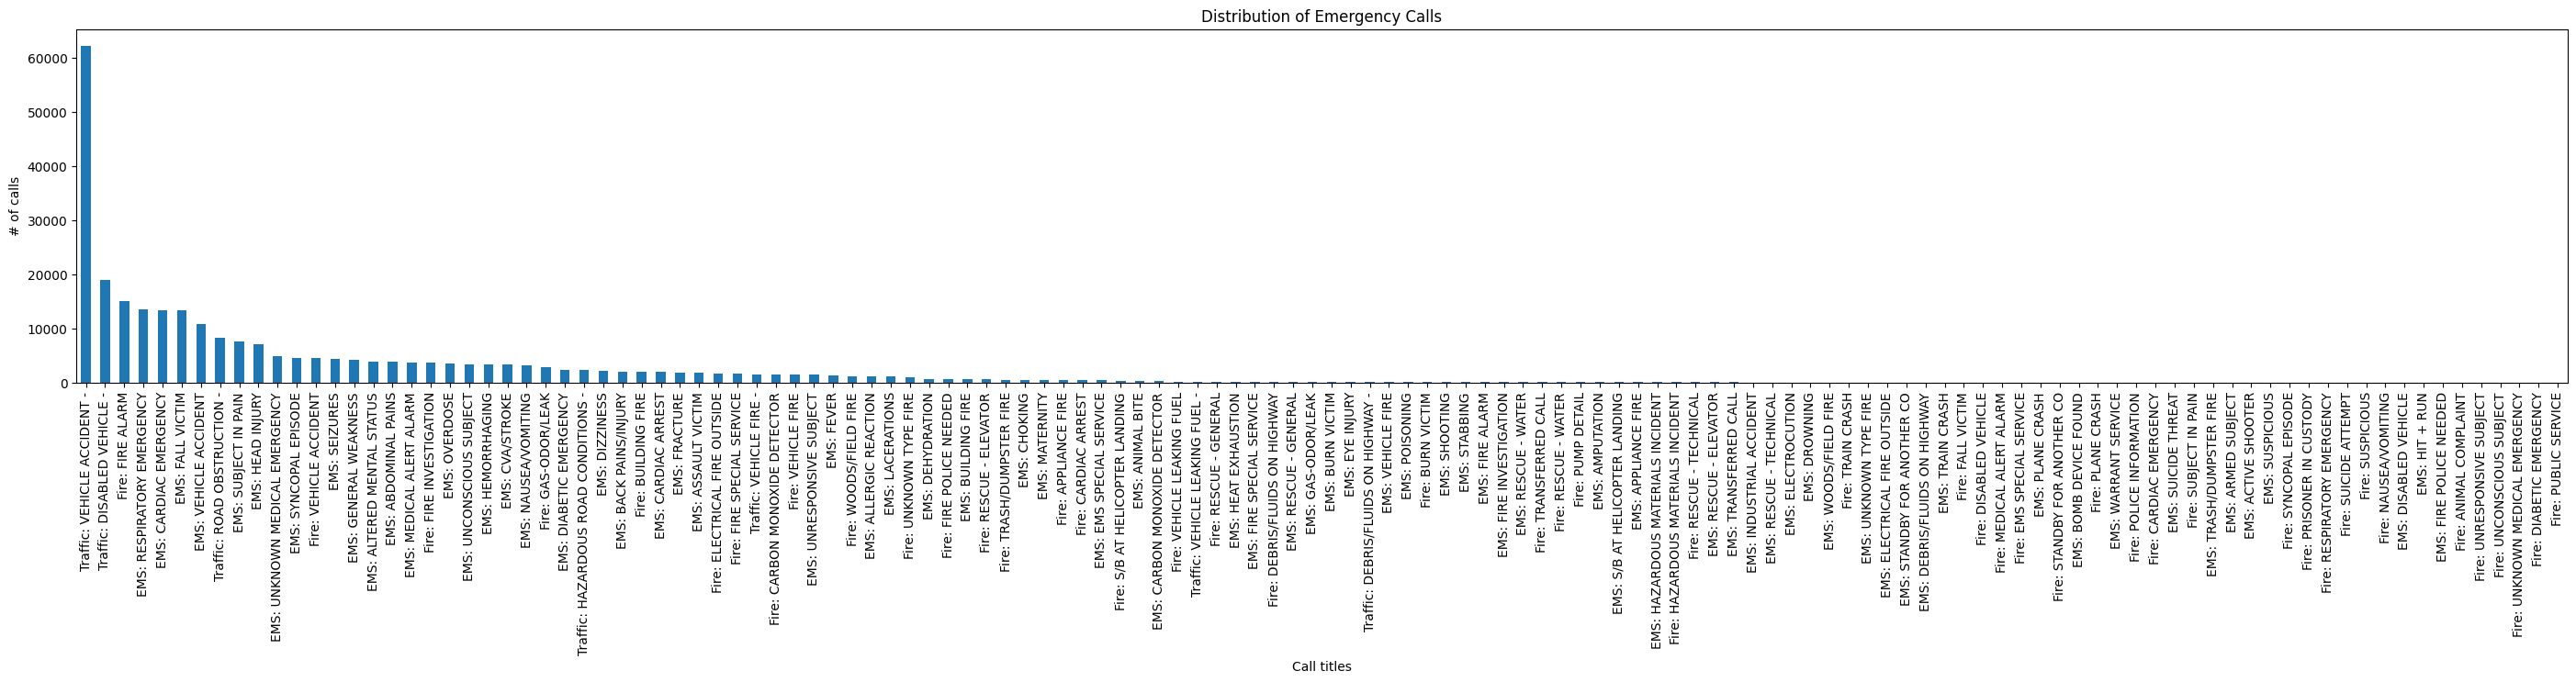

In [27]:
# (3.1) gets the frequency of the calls in the title column
emergency_dist = data['title'].value_counts().plot(kind='bar', figsize=(35,5), title='Distribution of Emergency Calls')
print(emergency_dist)
emergency_dist.set_xlabel('Call titles')
emergency_dist.set_ylabel('# of calls')

### (3.1) The most frequent reason for a call was Traffic: VEHICLE ACCIDENT with over 60,000 calls 

timeStamp
2015-12-31     7916
2016-01-31    13096
2016-02-29    11396
2016-03-31    11059
2016-04-30    11287
2016-05-31    11374
2016-06-30    11732
2016-07-31    12088
2016-08-31    11904
2016-09-30    11669
2016-10-31    12502
2016-11-30    12091
2016-12-31    12162
2017-01-31    11605
2017-02-28    10267
2017-03-31    11684
2017-04-30    11056
2017-05-31    11719
2017-06-30    12333
2017-07-31    11768
2017-08-31    11753
2017-09-30    11332
2017-10-31    11611
2017-11-30     1139
Freq: ME, Name: e, dtype: int64


C:\Users\Aman\AppData\Local\Temp\ipykernel_10528\2231446199.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  calls_m_y = calls_m_y.groupby(pd.Grouper(freq='M')).sum()


Text(0, 0.5, '# of calls')

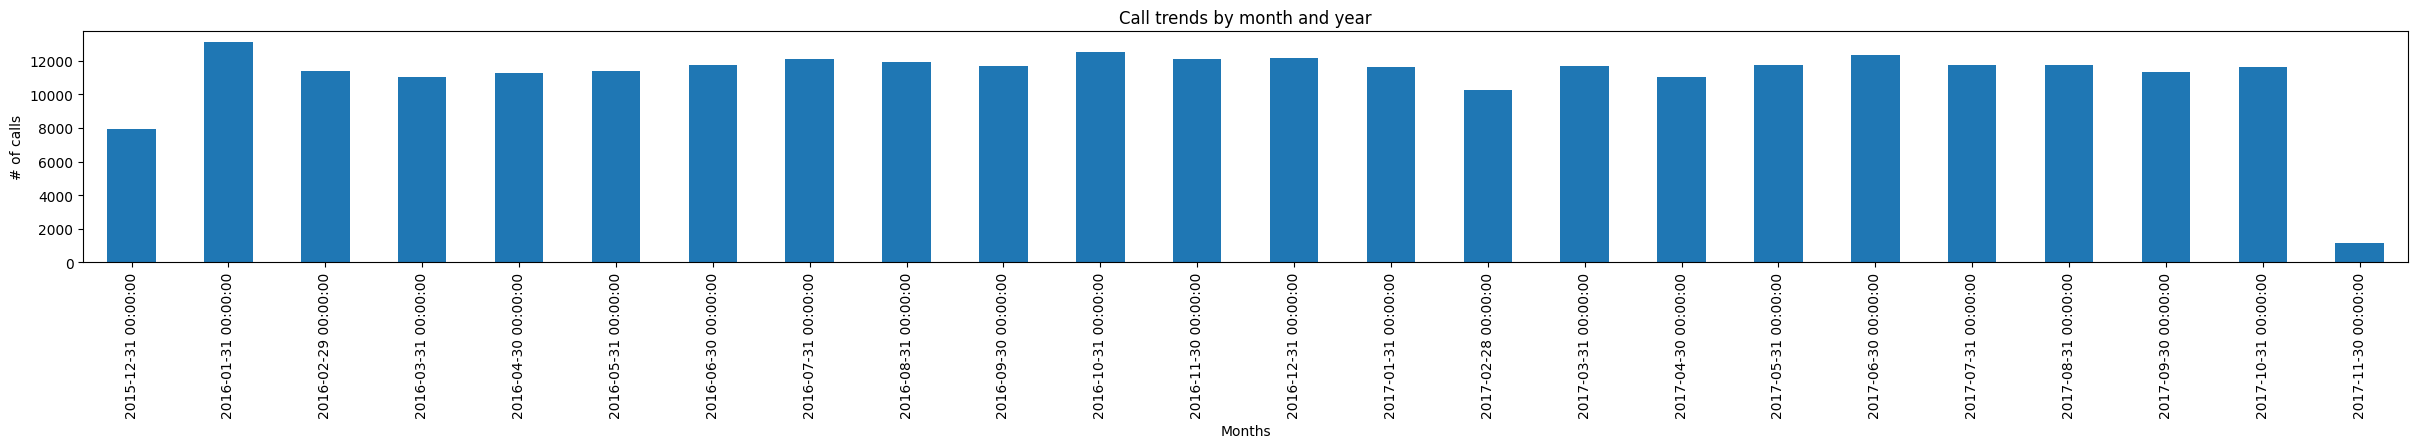

In [28]:
# (3.2) Create a visualization that shows the trend of calls over time by month and year

# Get new data frame including months and years
calls_m_y = data.index = pd.to_datetime(data['timeStamp'])
calls_m_y = data['e']

# Group data frame by months
calls_m_y = calls_m_y.groupby(pd.Grouper(freq='M')).sum()
print(calls_m_y)
calls_m_y_plot = calls_m_y.plot(kind='bar',figsize=(30,3),title='Call trends by month and year')
calls_m_y_plot.set_xlabel('Months')
calls_m_y_plot.set_ylabel('# of calls')


Top Zip codes
zip
0.0        32494.0
19401.0    18401.0
19464.0    17937.0
19403.0    13366.0
19446.0    12828.0
19406.0     8820.0
Name: count, dtype: float64


Text(0, 0.5, '# of calls')

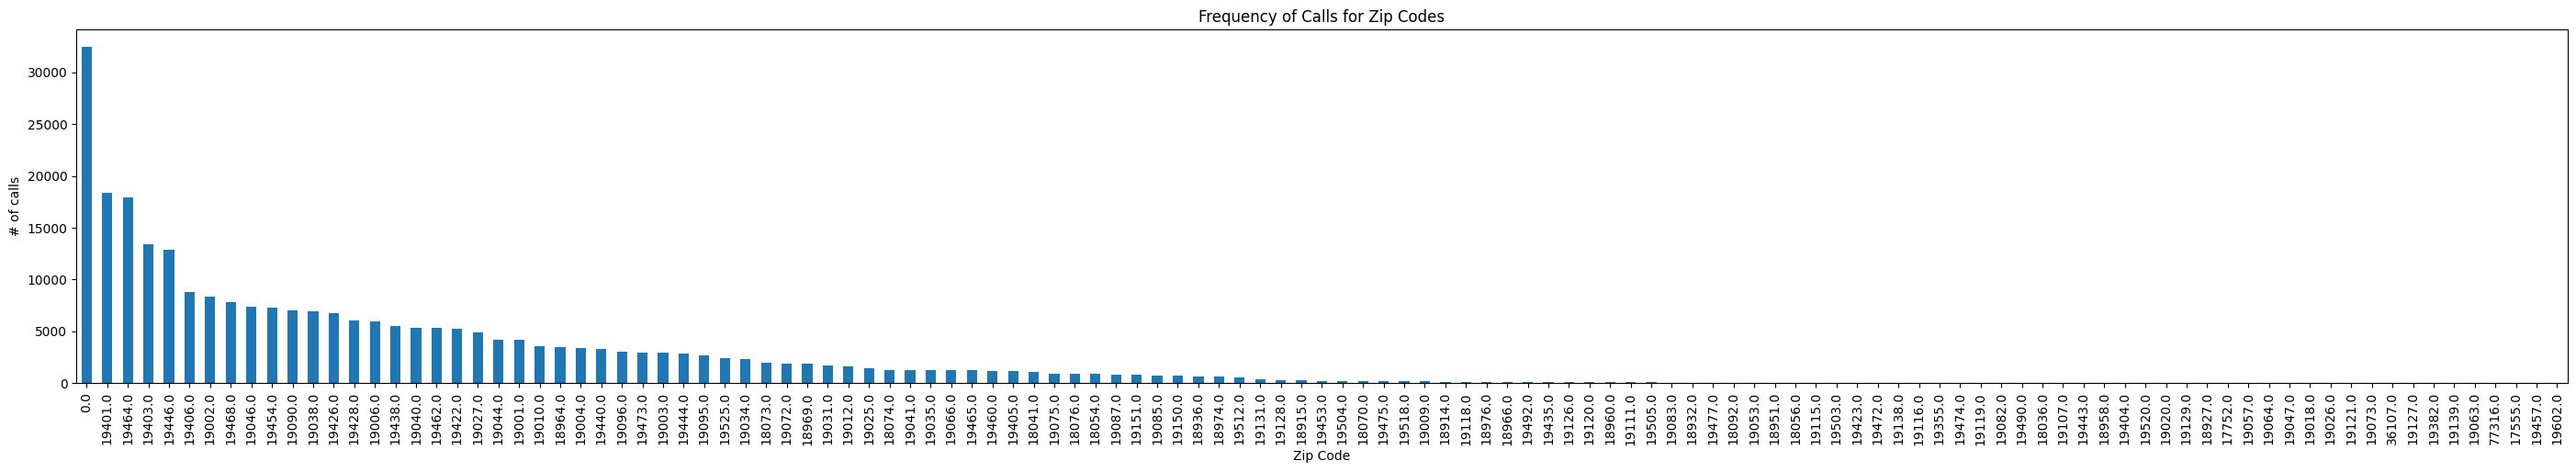

In [29]:
# (3.3) plot zip codes

# Get frequency of zip codes, ensure float64 data type
top_zip = data['zip'].value_counts()
top_zip = top_zip.astype('float64')

# print zip codes (assuming that the proffessor want zips in float64 format? wasnt specified)
print("Top Zip codes")
print(top_zip.head(6))

top_zip_plot = data['zip'].value_counts().plot(kind='bar', figsize=(35,5), title="Frequency of Calls for Zip Codes")
top_zip_plot.set_xlabel('Zip Code')
top_zip_plot.set_ylabel('# of calls')

Top Townships
twp
LOWER MERION    22886.0
ABINGTON        16379.0
NORRISTOWN      15421.0
UPPER MERION    14015.0
CHELTENHAM      12272.0
Name: count, dtype: float64


Text(0, 0.5, '# of calls')

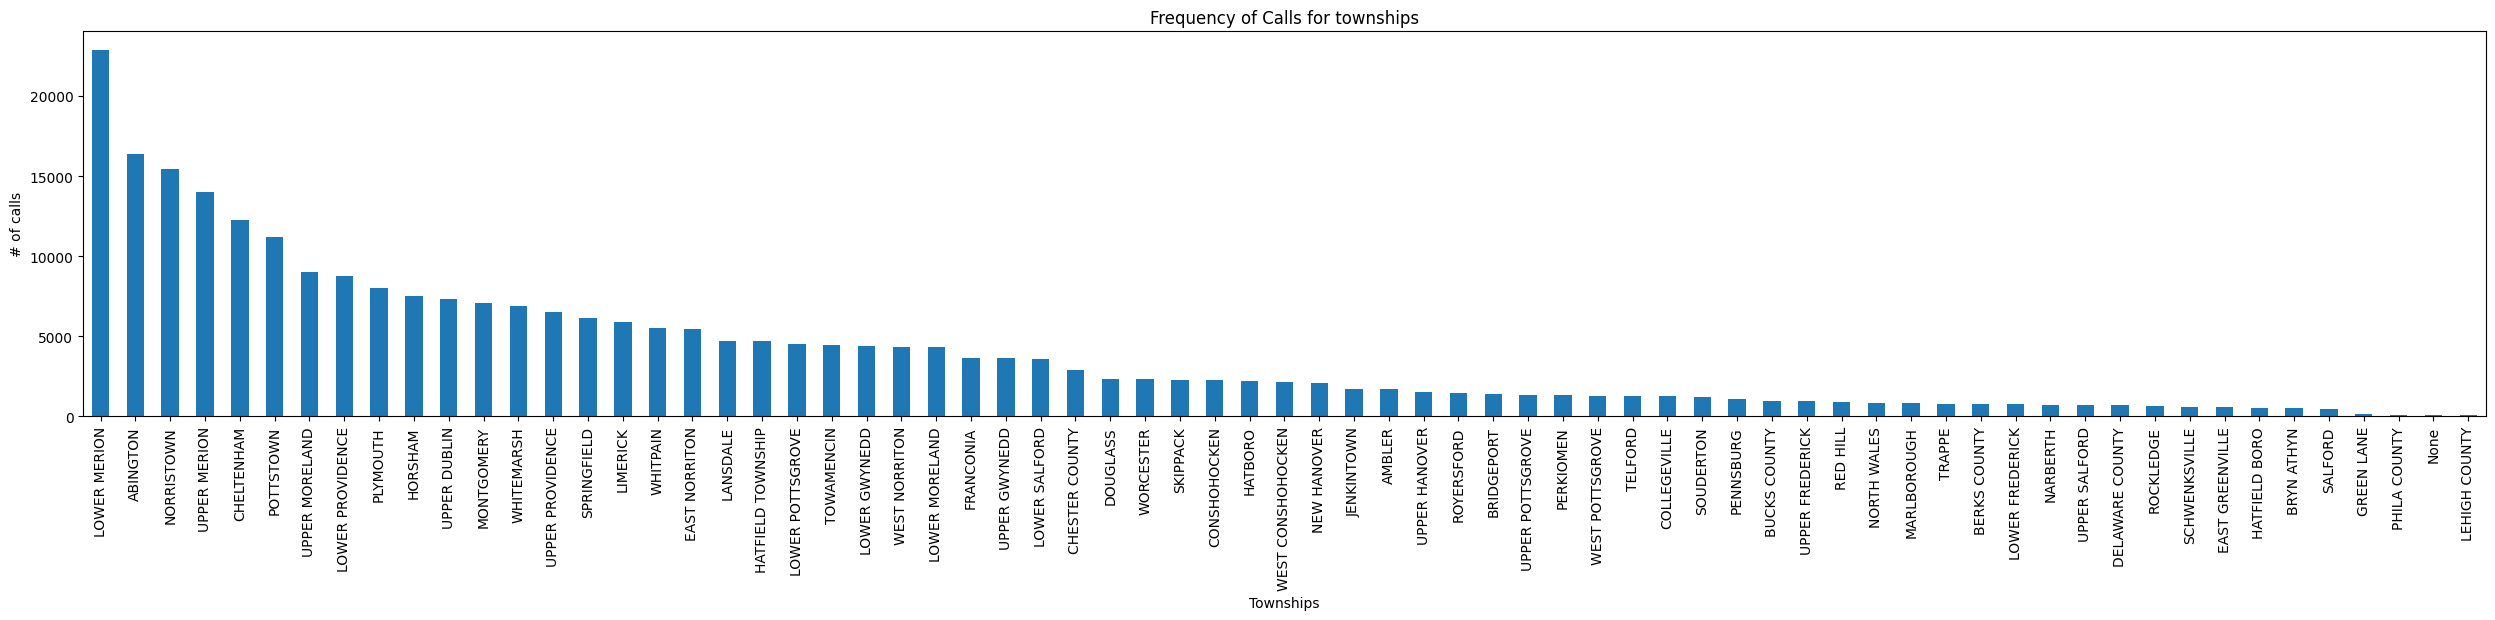

In [30]:
# (3.3)

# Get frequency of townships
top_twp = data['twp'].value_counts()
top_twp = top_twp.astype('float64')

print("Top Townships")
print(top_twp.head(5))

# Plot the frequency of the townshipps
top_twp_plot = top_twp.plot(kind='bar', figsize=(31,5), title="Frequency of Calls for townships")
top_twp_plot.set_xlabel('Townships')
top_twp_plot.set_ylabel('# of calls')

timeStamp
Friday       40706
Monday       39003
Saturday     35217
Sunday       31435
Thursday     39677
Tuesday      40288
Wednesday    40217
Name: e, dtype: int64


Text(0, 0.5, '# of calls')

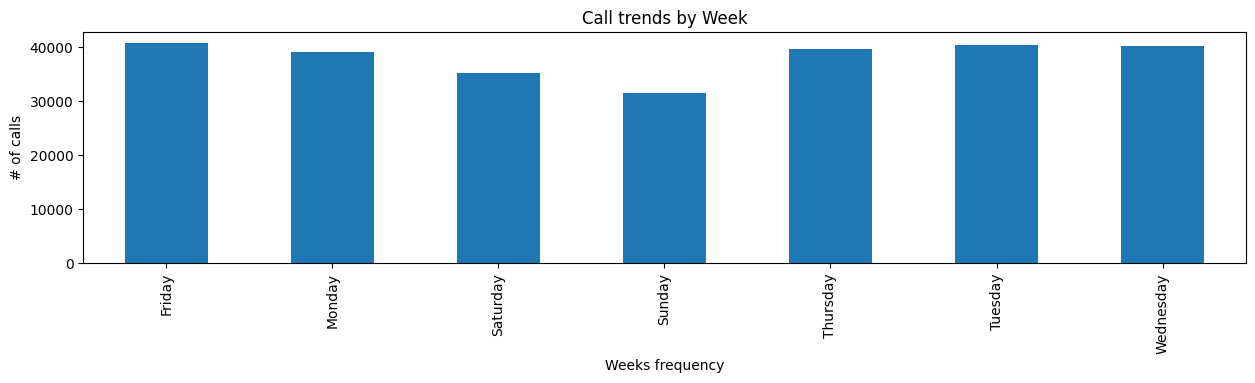

In [31]:
# (3.4)

# Get call frequency per week
week_calls = data.index = pd.to_datetime(data['timeStamp'])
week_calls = data['e']
week_calls = data.groupby(data['timeStamp'].dt.day_name())['e'].sum()
print(week_calls)

# plot the calls throughout the week
week_calls_plot = week_calls.plot(kind='bar',figsize=(15,3),title='Call trends by Week')
week_calls_plot.set_xlabel('Weeks frequency')
week_calls_plot.set_ylabel('# of calls')

### Task 4: Advanced Analysis (15 pts)
1.   Identify correlations between the hours of the day and the frequency of EMS, Fire, and Traffic emergency calls. Are there specific hours that experience higher frequencies of calls in these categories? Focus your analysis solely on the hourly distribution, without distinguishing between weekdays and weekends.



Text(0, 0.5, 'Average Calls For all categories')

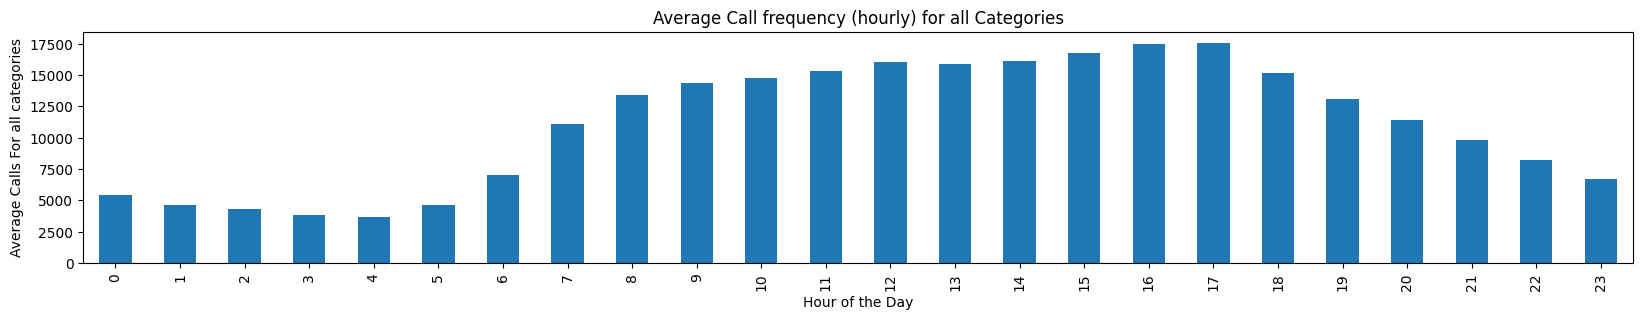

In [32]:
# (4.1)

# Gets average calls for all categories combined
average_calls_per_hour = data.groupby(data['timeStamp'].dt.hour)['e'].sum()
line_plot = average_calls_per_hour.plot(kind='bar', figsize=(20, 3), title='Average Call frequency (hourly) for all Categories')
line_plot.set_xlabel('Hour of the Day')
line_plot.set_ylabel('Average Calls For all categories')

Text(0, 0.5, 'Average Calls For EMS')

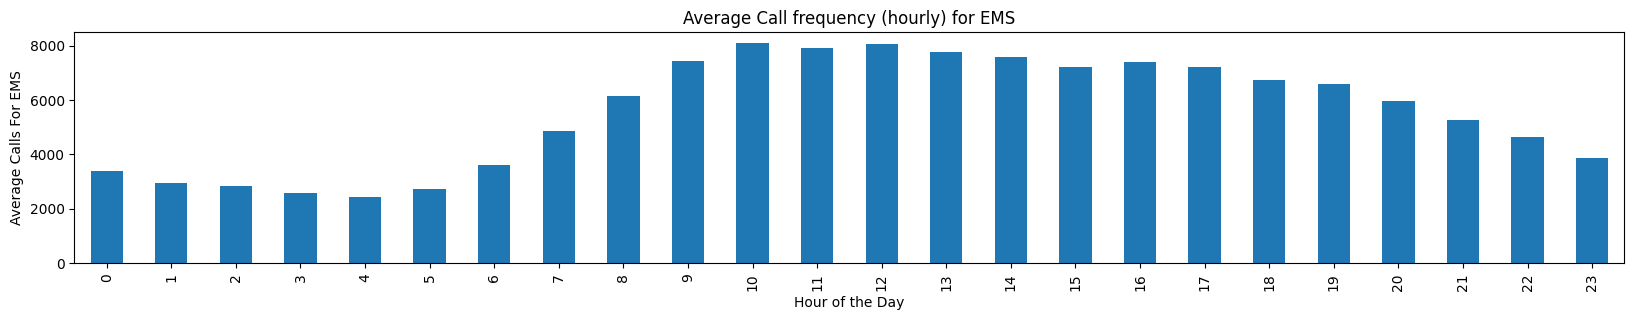

In [33]:
# (4.1)

# Average call frequency for EMS
ems_data = data[data['title'].str.startswith('EMS')]

average_calls_per_hour = ems_data.groupby(ems_data['timeStamp'].dt.hour)['e'].sum()
line_plot = average_calls_per_hour.plot(kind='bar', figsize=(20, 3), title='Average Call frequency (hourly) for EMS')
line_plot.set_xlabel('Hour of the Day')
line_plot.set_ylabel('Average Calls For EMS')

Text(0, 0.5, 'Average Calls For Fire data')

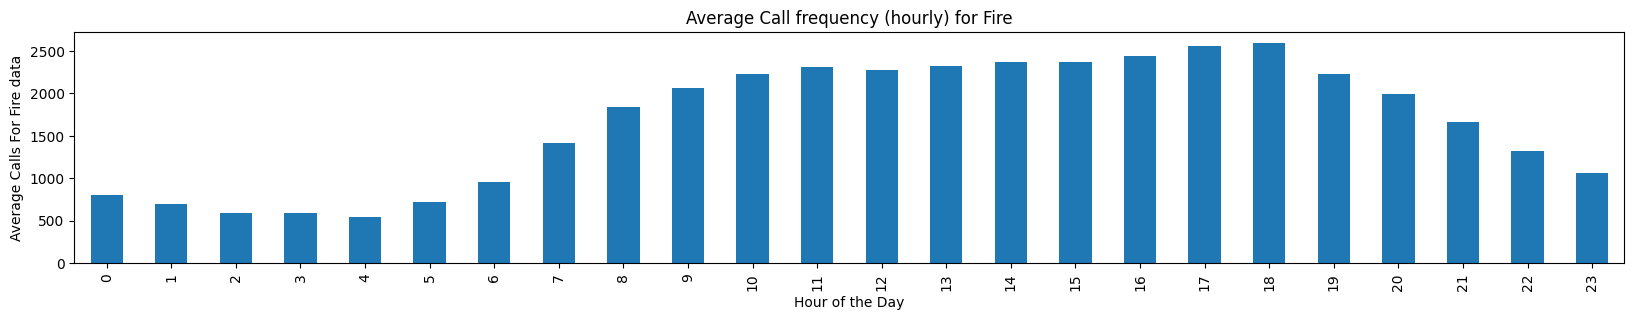

In [34]:
# (4.1)

# Average call frequency for Fire
fire_data = data[data['title'].str.startswith('Fire')]

average_calls_per_hour = fire_data.groupby(fire_data['timeStamp'].dt.hour)['e'].sum()
line_plot = average_calls_per_hour.plot(kind='bar', figsize=(20, 3), title='Average Call frequency (hourly) for Fire')
line_plot.set_xlabel('Hour of the Day')
line_plot.set_ylabel('Average Calls For Fire data')


Text(0, 0.5, 'Average Calls For Traffic data')

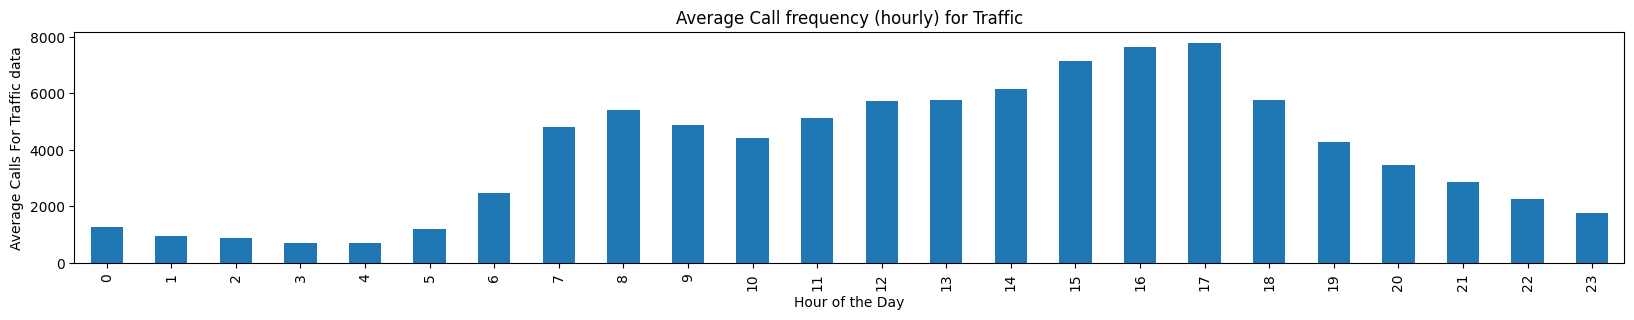

In [35]:
# (4.1)

# Average call frequency for Traffic
traffic_data = data[data['title'].str.startswith('Traffic')]

average_calls_per_hour = traffic_data.groupby(traffic_data['timeStamp'].dt.hour)['e'].sum()
line_plot = average_calls_per_hour.plot(kind='bar', figsize=(20, 3), title='Average Call frequency (hourly) for Traffic')
line_plot.set_xlabel('Hour of the Day')
line_plot.set_ylabel('Average Calls For Traffic data')

### (4.1)
- High call frequency for traffic at around 17:00 hours and low at around 03:00 hours
- High call frequency for Fire at around 18:00 hours and low at around 04:00 hours
- High call frequency for EMS at around 10:00 hours and low at around 04:00 hours
- Fire and traffic have similar distributions so they might be correalated in call frequency hourly

# Task 5: Conclusions (10 pts)
## Call frequencies Hourly
- High call frequency for traffic at around 17:00 hours and low at around 03:00 hours
- High call frequency for Fire at around 17:00 hours and low at around 03:00 hours
- High call frequency for EMS at around 10:00 and 12:00 hours and low at around 04:00 hours
- Conclusion: Most calls happen between 08:00 and 18:00 hours. Fire and Traffic have very similar distributions of calls. 

## Call frequencies Weekly
- During the week, most calls happen on Friday with a total of 40706 calls
- During the week, the least amount of call happen on Sunday with 31435 calls
- Conclusion: Data makes sense. Most people do not travel on Sunday, and many people are doing activites on Friday.

## Call frequencies Monthly
- Calls reached an all time high in January 2016.
- Calls has an all time low in November 2017.
- Conclusion: Call frequencies each month seem uniform except for November 2017 and December 2015.

## Top Zips and Townships
- The call frequency for townships was not uniformly distributed; most calls came from LOWER MERION, ABINGTON, NORRISTOWN, UPPER MERION, CHELTENHAM.
- Most of the entries do not include a zip codes and are defaulted to '0.'

## Final Conclusions
- Most calls happend Aat 15:00 to 18:00 hours, on average. This makes sense since most people are heading home from work or doing activities at that time.
- Not may calls are made on Sunday, and many call are made on Friday.
- Calls happen less frequently at the end of the year.
- Record keeping for zip codes was not done well.
- Most calls happen in LOWER MERION, ABINGTON, NORRISTOWN, UPPER MERION and CHELTENHAM.

# Submission Guidelines:


1.   Your assignment should be submitted as a Python Notebook containing the code, visualizations, and comments explaining your analysis and findings.
2.   You may use Google Colab / Jupyter notebook for code execution.
3. Ensure your code is well-commented to explain the purpose of each step and your interpretation of the results.
4. Employ Pandas for data exploration and manipulation.
5. Utilise Matplotlib and Seaborn for data visualisation.
6. Ensure to title your notebooks as "StudentID_assignment1".
7. Failure to adhere to the naming format may result in a **5-point deduction** from the total score.


Submit your notebook via the Canvas before the **deadline (02/23/2024, 10:59PM).**

# Grading Criteria:

- Task 1: 15 pts
- Task 2: 25 pts
- Task 3: 30 pts
- Task 4: 15 pts
- Task 5: 10 pts

Code Quality and Comments: 5 pts

Good luck!